# Employee Attrition Prediction Model

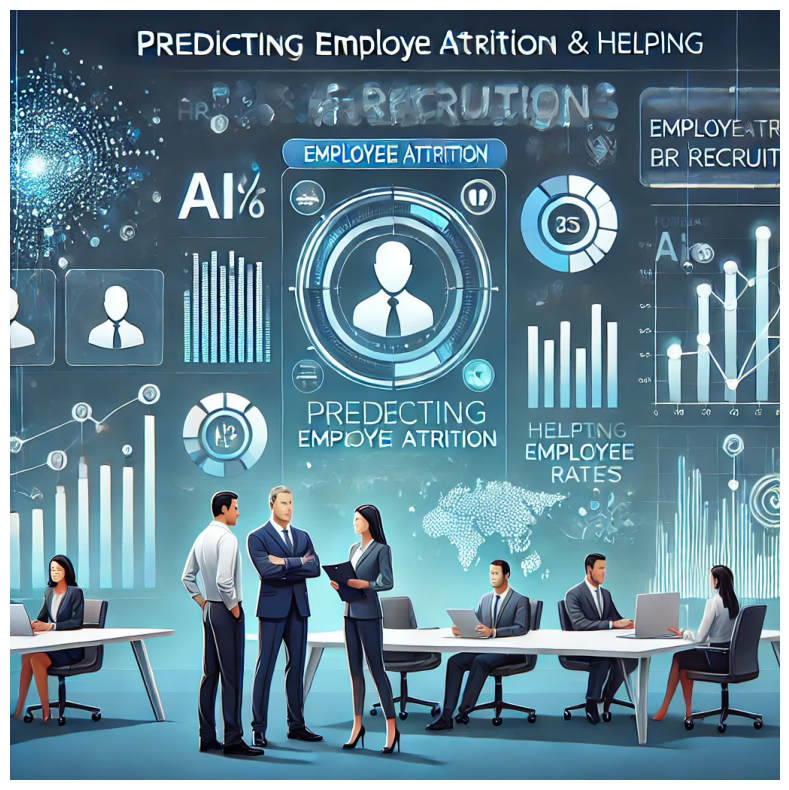

In [5]:
import matplotlib.pyplot as plt
from PIL import Image
img = Image.open("C://Users//SHONIMA S//Downloads//pic.webp")
img.save("output.png","PNG")
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.axis('off')
plt.show()

# Project Title: Predicting Employee Attrition and Helping HR’s for Recruitment


### **Overview:**
Employee turnover (attrition) is a major cost to an organization. Our project focuses on understanding the reasons behind employee attrition and predicting future turnover to support HR recruitment strategies. We aim to address both tangible costs (e.g., training) and intangible losses (e.g., knowledge and relationships). Additionally, we provide tools to predict the attrition rate of potential recruits.


### **Data Source:**
- **Link:** [Employee Attrition Dataset](https://drive.google.com/drive/folders/1f_dl3oiu6jBjrJCA5eaZfaa1AGUKfRNk)

### **Project Work:**

#### **Phase 1:**
1. **Data Analysis:** Explore and hypothesize based on available data.
2. **Data Cleaning:** Prepare data for analysis.
3. **Visualization:** Insights using PowerBI.
4. **Feature Engineering:** Enhance features to improve model performance.
5. **Model Building:** Test models including Decision Tree, Logistic Regression, SVM, and Random Forest.
6. **Evaluation:** Metrics like Accuracy, Precision, Recall, and F1 Score to select the best model.

#### **Phase 2:**
1. **Advanced Features:** Incorporate complex features using TensorFlow.
2. **Model Finalization:** Develop a pickle file for the best model.
3. **Comprehensive Analysis:** Use PowerBI for outcome visualization.


### **Research Paper Reference:**
- **Title:** Early Prediction of Employee Attrition using Data Mining  
- **Source:** [IEEE Research Paper](https://ieeexplore.ieee.org/document/8692137)


# 1.Importing Libraries:like numpy, pandas, seaborn, and matplotlib 

- **numpy (np):** A library for numerical computations, especially for working with arrays and matrices.  
- **pandas (pd):** A library for data manipulation and analysis, especially for working with structured data.  
- **seaborn (sns):** A library for creating beautiful and informative statistical graphics.  
- **matplotlib.pyplot** (plt): A library for creating basic plots and visualizations.  
- **%matplotlib inline:** A special command for Jupyter Notebooks to display plots directly in the notebook.

In [6]:
import numpy as np    
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# 2.Importing Machine Learning Tools

- **Decision Tree Classifier:** A machine learning model that splits data based on feature conditions to classify it.

- **Random Forest Classifier:** An ensemble model combining multiple decision trees to improve classification performance.

- **Support Vector Classifier (SVC):** A model that separates data points with the widest possible margin using hyperplanes.

- **Logistic Regression:** A linear model for binary or multiclass classification using a logistic function.

- **train_test_split:** Imports a utility function to split a dataset into training and testing subsets for model evaluation.

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# 3.Importing Performance Metrics

- **accuracy_score:** Measures the percentage of correct predictions.
    
- **precision_score:** Evaluates the proportion of true positives among predicted positives.
    
- **recall_score:** Measures the proportion of true positives among actual positives.
    
- **f1_score:** Combines precision and recall into a harmonic mean.
    
- **classification_report:** Provides a detailed summary of precision, recall, F1-score, and support for each class.

In [8]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 4.Suppressing Warnings

- **warnings:** A library for handling warning messages.
- **warnings.filterwarnings('ignore'):** This suppresses warning messages to avoid cluttering the output.


In [9]:
import warnings
warnings.filterwarnings('ignore')

# Phase 1:

# 1. Data Analysis

Explore the data to check its structure and statistics.

• Load the employee dataset from a CSV file using pandas.

In [10]:
data = pd.read_csv('C://Users//SHONIMA S//OneDrive//Documents//entry project//Employee_data_.csv', delimiter=',')

In [11]:
data.head()  #Displays the first few rows (default 5) of the dataset.

,name,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,department,salary,salary_level
0,SMITH,0.38,0.53,2,157,3,0,1,0,sales,low,1
1,JOHNSON,0.80,0.86,5,262,6,0,1,0,sales,medium,2
2,WILLIAMS,0.11,0.88,7,272,4,0,1,0,sales,medium,2
3,BROWN,0.72,0.87,5,223,5,0,1,0,sales,low,1
4,JONES,0.37,0.52,2,159,3,0,1,0,sales,low,1


In [12]:
data.describe()   #Shows summary statistics (like mean, min, max) for numerical columns in the dataset.

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,3.000000


In [13]:
data.info()  # Provides a summary of the dataset, including the number of non-null entries and data types of each column.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   name                    14998 non-null  object 
 1   satisfaction_level      14999 non-null  float64
 2   last_evaluation         14999 non-null  float64
 3   number_projects         14999 non-null  int64  
 4   average_monthly_hours   14999 non-null  int64  
 5   time_spent_company      14999 non-null  int64  
 6   work_accident           14999 non-null  int64  
 7   left                    14999 non-null  int64  
 8   promotion_last_5_years  14999 non-null  int64  
 9   department              14999 non-null  object 
 10  salary                  14999 non-null  object 
 11  salary_level            14999 non-null  int64  
dtypes: float64(2), int64(7), object(3)
memory usage: 1.4+ MB


In [14]:
# Check for missing values 
missing_values = data.isnull().sum()   #creates a new dataset of the same size as data, but each value is replaced with True if it's missing and False otherwise.
print("Missing Values:\n", missing_values)

Missing Values:
 name                      1
satisfaction_level        0
last_evaluation           0
number_projects           0
average_monthly_hours     0
time_spent_company        0
work_accident             0
left                      0
promotion_last_5_years    0
department                0
salary                    0
salary_level              0
dtype: int64


In [15]:
# Check for duplicates
duplicates = data.duplicated().sum()
print("Number of Duplicates:", duplicates)

Number of Duplicates: 0


- **data['left'] == 1 :** creates a condition that checks which rows have 'left' equal to 1 (i.e., employees who left).
- **data[...]:** filters the dataset to include only rows where the condition is True.
- **.shape:** gives the dimensions of the filtered dataset as (number of rows, number of columns).
- **.shape[0]:** extracts the number of rows, i.e., the count of employees who left.




In [16]:
# Analyze Employee status :
#Counts the number of employees who have left the company.
print("Employees left:", data[data['left'] == 1].shape[0])
#Counts the number of employees who are still working at the company.
print("Employees stayed:", data[data['left'] == 0].shape[0])

Employees left: 3571
Employees stayed: 11428


In [17]:
# Group-wise mean comparison
group_left = data[data['left'] == 1].mean()  #It filters the data for employees who left and calculates the average of their data.
group_stay = data[data['left'] == 0].mean()  #filters the data for employees who haven't left  and calculates the average of their data.
print("Average values of employees who left:\n", group_left)
print("Average values of employees who stayed:\n", group_stay)


Average values of employees who left:
 satisfaction_level          0.440098
last_evaluation             0.718113
number_projects             3.855503
average_monthly_hours     207.419210
time_spent_company          3.876505
work_accident               0.047326
left                        1.000000
promotion_last_5_years      0.005321
salary_level                1.414730
dtype: float64
Average values of employees who stayed:
 satisfaction_level          0.666810
last_evaluation             0.715473
number_projects             3.786664
average_monthly_hours     199.060203
time_spent_company          3.380032
work_accident               0.175009
left                        0.000000
promotion_last_5_years      0.026251
salary_level                1.650945
dtype: float64


# 2. Data Cleaning

**Outliers** are data points that differ significantly from the majority of other data points in a dataset. They are unusually high or low values that can skew statistical analysis or model performance.

**1. Detect and handle outliers.**

**1. Z-Score:** Calculates Z-scores to identify values that are far from the mean.

In [18]:
#imports the stats module from the SciPy library, which is a powerful scientific computing library in Python. The stats module provides a wide range of statistical functions,
from scipy import stats 

In [19]:
# Outlier detection using Z-score
z_scores = np.abs(stats.zscore(data.select_dtypes(include=[np.number])))
outliers_z = np.where(z_scores > 3)
print("Outliers detected by Z-score:", outliers_z[0])

Outliers detected by Z-score: [   18    82   171   287   584   751  1000  1667  4499  4500  4501  4502
  4503  4504  4505  4506  4507  4508  4509  4510  4511  4512  4536  4537
  4538  4539  4540  4541  4542  4543  4544  4545  4546  4547  4548  4549
  4550  4551  4552  4553  4554  4555  4556  4557  4558  4727  4728  4729
  4730  4731  4732  4733  4734  4735  4736  4737  4738  5031  5032  5033
  5034  5035  5036  5037  5038  5039  5040  5041  5042  5055  5056  5057
  5058  5059  5060  5115  5116  5117  5118  5119  5120  5121  5122  5518
  5519  5520  5521  5522  5523  5524  5525  5526  5527  5528  5529  5530
  5531  5532 10776 10777 10778 10779 10780 10855 10856 10857 10858 10859
 10933 10934 10935 10936 10937 10938 10939 10940 10941 10942 11007 11008
 11009 11010 11011 11078 11079 11080 11081 11082 11083 11124 11125 11126
 11127 11128 11129 11179 11180 11181 11182 11183 11184 11185 11186 11193
 11194 11195 11196 11197 11198 11199 11213 11214 11214 11215 11215 11216
 11216 11217 11217 11

**2.IQR (Interquartile Range):** Uses the IQR to detect outliers in numerical columns.


In [20]:
# Outlier detection using IQR
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
outliers_iqr = data[((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).any(axis=1)]
print("Outliers detected by IQR:\n", outliers_iqr)


Outliers detected by IQR:
            name  satisfaction_level  last_evaluation  number_projects  \
0         SMITH                0.38             0.53                2   
1       JOHNSON                0.80             0.86                5   
2      WILLIAMS                0.11             0.88                7   
3         BROWN                0.72             0.87                5   
4         JONES                0.37             0.52                2   
...         ...                 ...              ...              ...   
14994     WELDY                0.40             0.57                2   
14995    VINTON                0.37             0.48                2   
14996    SALIBA                0.37             0.53                2   
14997    PARMAR                0.11             0.96                6   
14998    OSTLER                0.37             0.52                2   

       average_monthly_hours  time_spent_company  work_accident  left  \
0                      

**3.Boxplots:** Visualizes outliers for numerical columns.


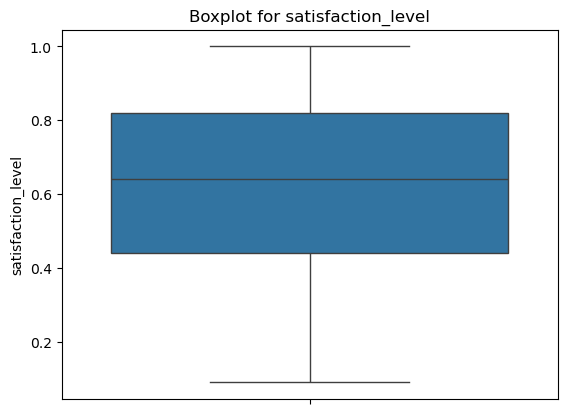

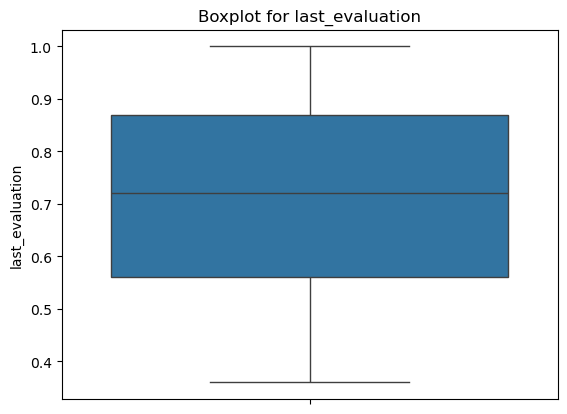

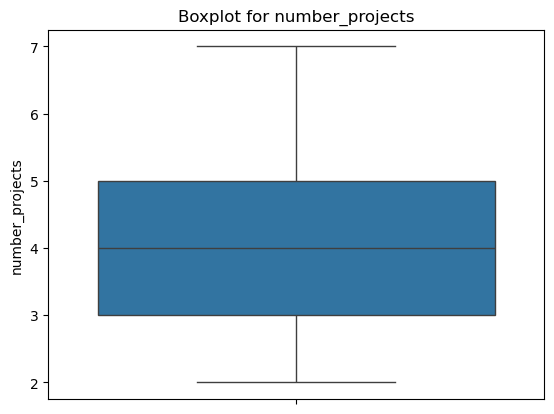

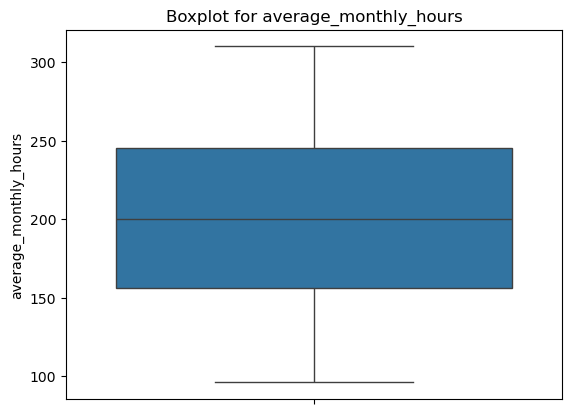

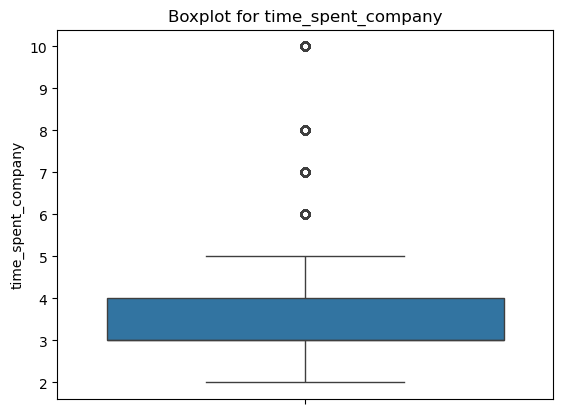

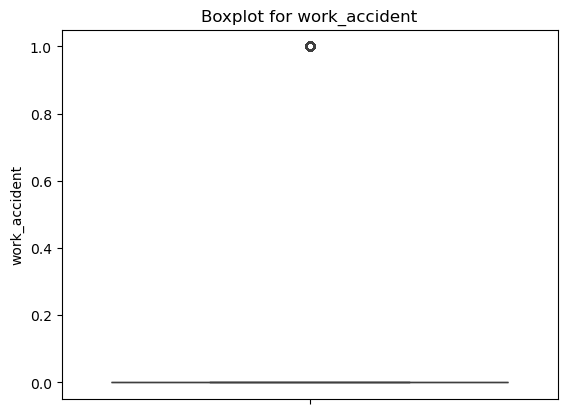

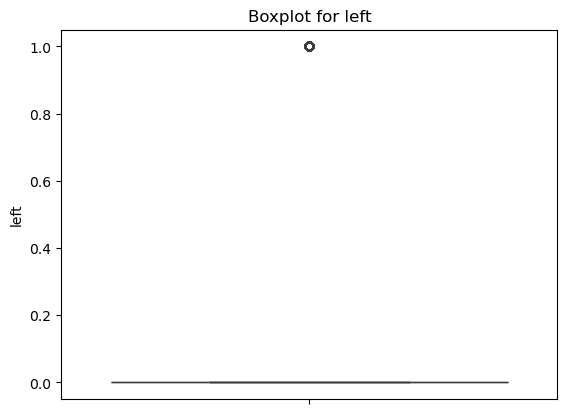

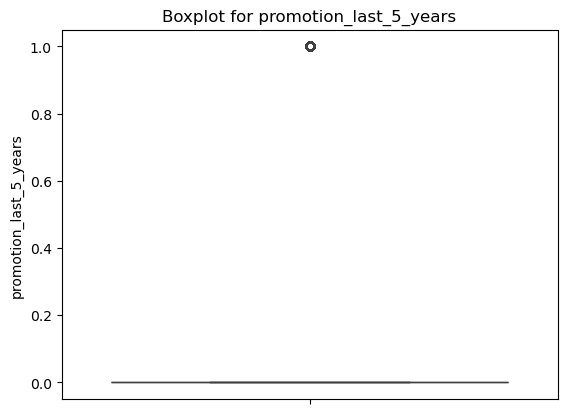

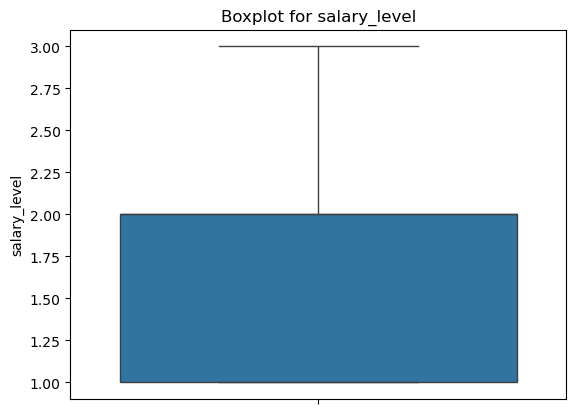

In [21]:
#Visualizing Outliers Using Boxplots:
# Plot boxplots for numerical columns to detect outliers visually
numerical_cols = data.select_dtypes(include=[np.number]).columns

for col in numerical_cols:
    sns.boxplot(data[col])
    plt.title(f'Boxplot for {col}')
    plt.show()

**2.Analyze skewness.**



**Skewness** measures the asymmetry of a data distribution, indicating whether it is skewed to the left (negative skew) or right (positive skew) of the mean.

In [22]:
# Check skewness of each column
skewness = data.skew()
print("Skewness:\n", skewness)

Skewness:
 satisfaction_level       -0.476360
last_evaluation          -0.026622
number_projects           0.337706
average_monthly_hours     0.052842
time_spent_company        1.853319
work_accident             2.021149
left                      1.230043
promotion_last_5_years    6.636968
salary_level              0.598882
dtype: float64


In [23]:
# Display columns with high skewness (threshold set to 1 or -1)
highly_skewed = skewness[abs(skewness) > 1]
# Print the highly skewed features
print("Highly skewed features:")
print(highly_skewed)

Highly skewed features:
time_spent_company        1.853319
work_accident             2.021149
left                      1.230043
promotion_last_5_years    6.636968
dtype: float64


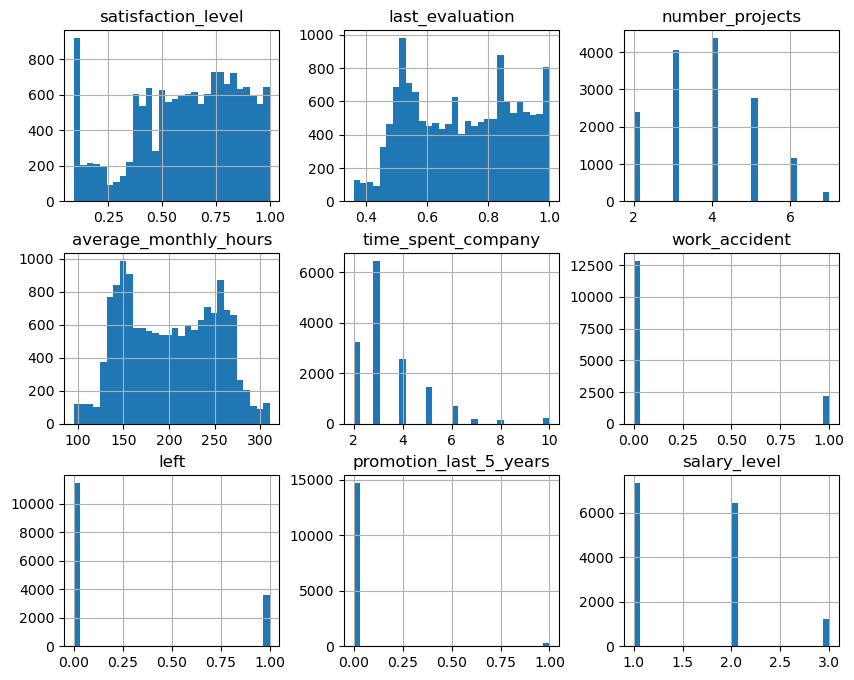

In [24]:
#Visualize Skewness 
# Visualize distribution of columns with skewed data
data.hist(bins=30, figsize=(10, 8))
plt.show()

In [25]:
# Log transformation for highly skewed columns
for feature in highly_skewed.index:
    if feature in data.columns:
        data[feature] = np.log1p(data[feature])  # Apply log transformation
        print(f"Log transformation applied to: {feature}")


Log transformation applied to: time_spent_company
Log transformation applied to: work_accident
Log transformation applied to: left
Log transformation applied to: promotion_last_5_years


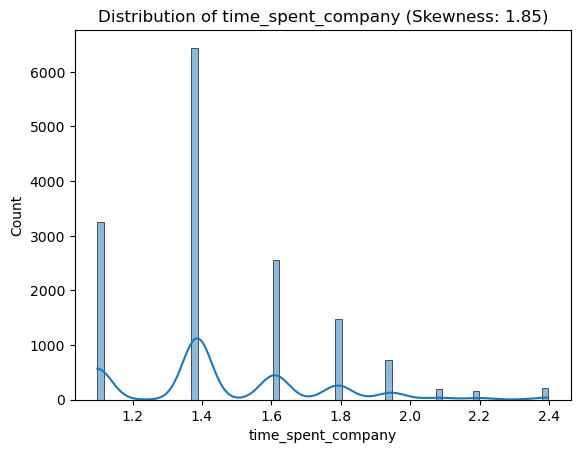

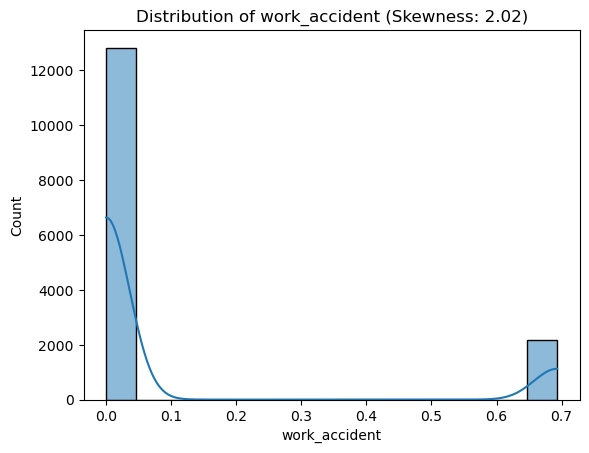

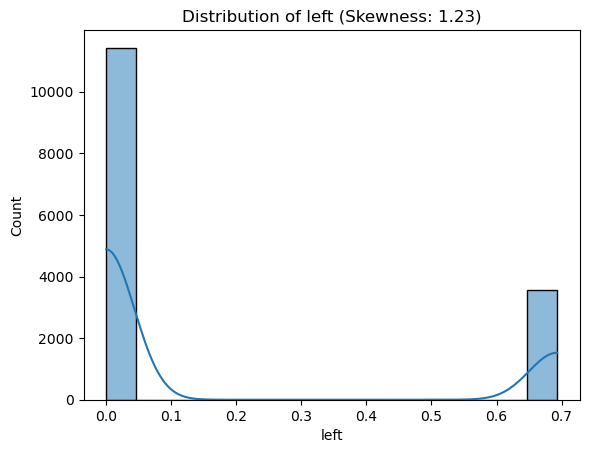

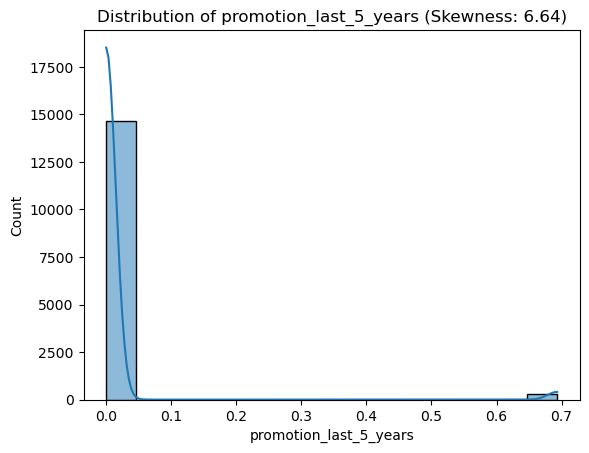

In [26]:
# Visualize the distribution of transformed features
for feature in highly_skewed.index:
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature} (Skewness: {skewness[feature]:.2f})')
    plt.show()

# 3. Visualization

In [27]:
# Calculates the correlation matrix for the dataset data.
corr = data.corr()
corr

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.140315,0.058697,-0.388375,0.025605,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.138601,-0.007104,0.006567,-0.008684,-0.013002
number_projects,-0.142970,0.349333,1.000000,0.417211,0.219878,-0.004741,0.023787,-0.006064,-0.001803
average_monthly_hours,-0.020048,0.339742,0.417211,1.000000,0.140748,-0.010143,0.071287,-0.003544,-0.002242
time_spent_company,-0.140315,0.138601,0.219878,0.140748,1.000000,-0.011578,0.206624,0.056012,0.027795
work_accident,0.058697,-0.007104,-0.004741,-0.010143,-0.011578,1.000000,-0.154622,0.039245,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.206624,-0.154622,1.000000,-0.061788,-0.157898
promotion_last_5_years,0.025605,-0.008684,-0.006064,-0.003544,0.056012,0.039245,-0.061788,1.000000,0.098119
salary_level,0.050022,-0.013002,-0.001803,-0.002242,0.027795,0.009247,-0.157898,0.098119,1.000000


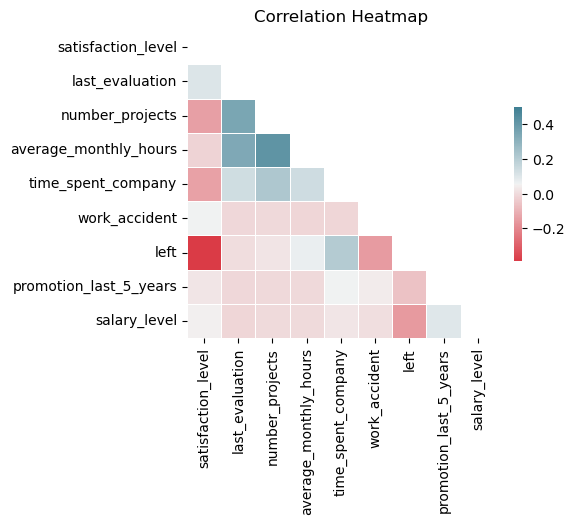

In [28]:
#Creates a mask with the same shape as corr.
mask = np.zeros_like(corr, dtype=np.bool)

#Updates the mask to True for the upper triangle of the matrix.
mask[np.triu_indices_from(mask)] = True

# Set up the Creates a 5x4 inch matplotlib figure and axis for plotting.
f, ax = plt.subplots(figsize=(5, 4))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.5,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.title("Correlation Heatmap")
plt.show()

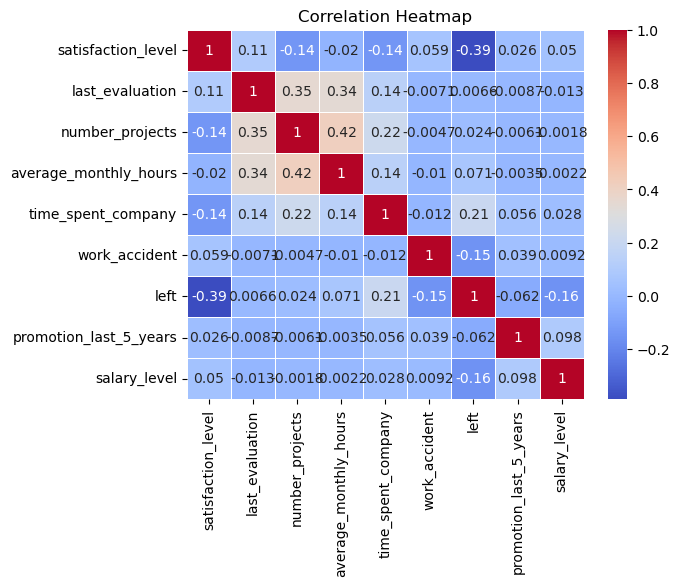

In [29]:
#Creates a heatmap of the correlation matrix (corr) with annotations (cell values), 'coolwarm' color map, and 0.5 linewidth between cells.
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
#Adds the title "Correlation Heatmap" to the plot.
plt.title("Correlation Heatmap")
# Displays the plot.
plt.show()

# Explore relationships between salary, satisfaction_level, and other features 

`catplot` is a Seaborn function that creates categorical plots (like box plots, violin plots, or bar plots) to visualize the relationship between a categorical variable and a continuous variable.

**1.Plots a box plot to show the distribution of satisfaction_level vs. salary.**

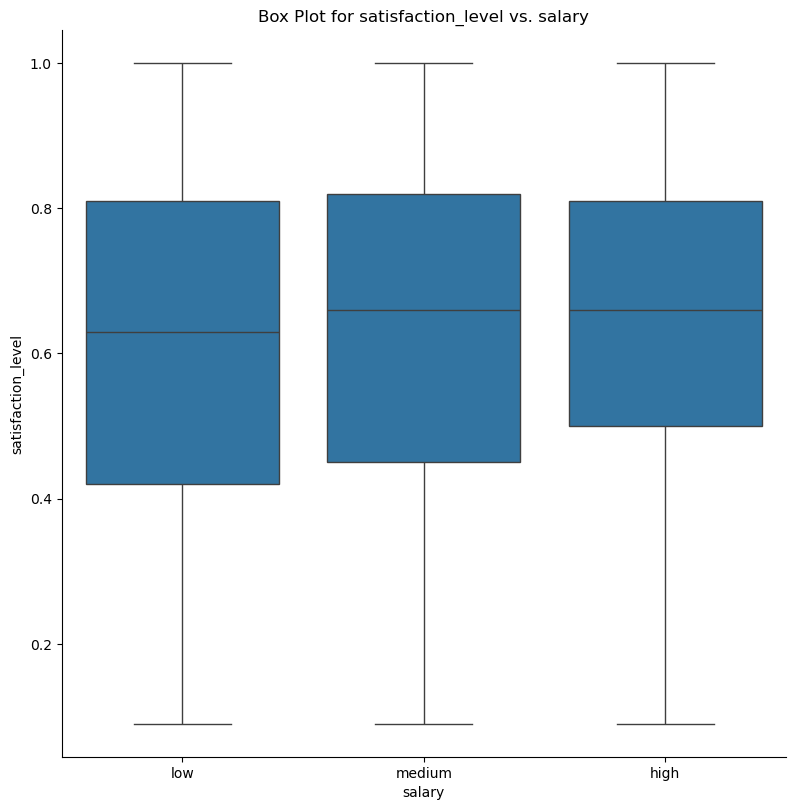

In [30]:
sns.catplot(data=data, x='salary', y='satisfaction_level', kind='box', height=8)
plt.title('Box Plot for satisfaction_level vs. salary')
plt.show()


**2.Plots a violin plot for satisfaction_level vs. salary.**

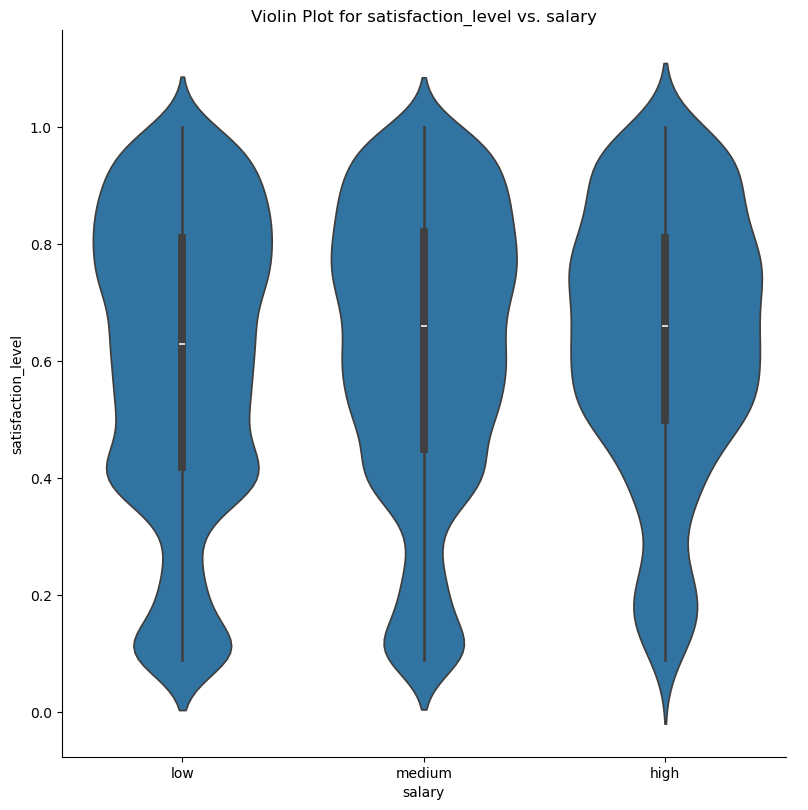

In [31]:
sns.catplot(data=data, x='salary', y='satisfaction_level', kind='violin', height=8)
plt.title('Violin Plot for satisfaction_level vs. salary')
plt.show()

**3.Plots a box plot for average_monthly_hours vs. salary.**

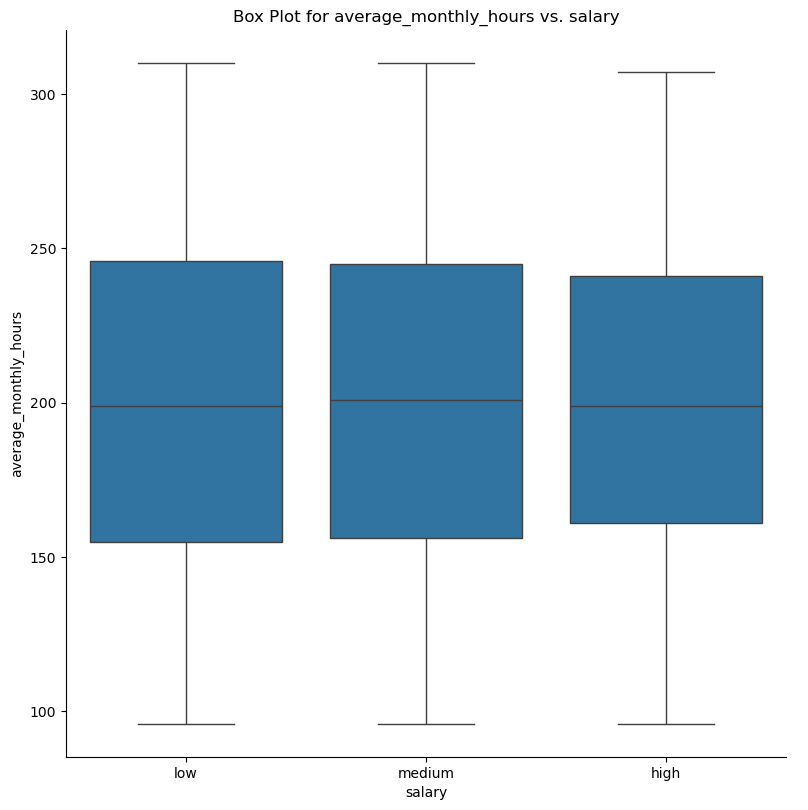

In [32]:
sns.catplot(data=data, x='salary', y='average_monthly_hours', kind='box', height=8)
plt.title('Box Plot for average_monthly_hours vs. salary')
plt.show()


**4.Plots a violin plot for time_spent_company vs. salary.**

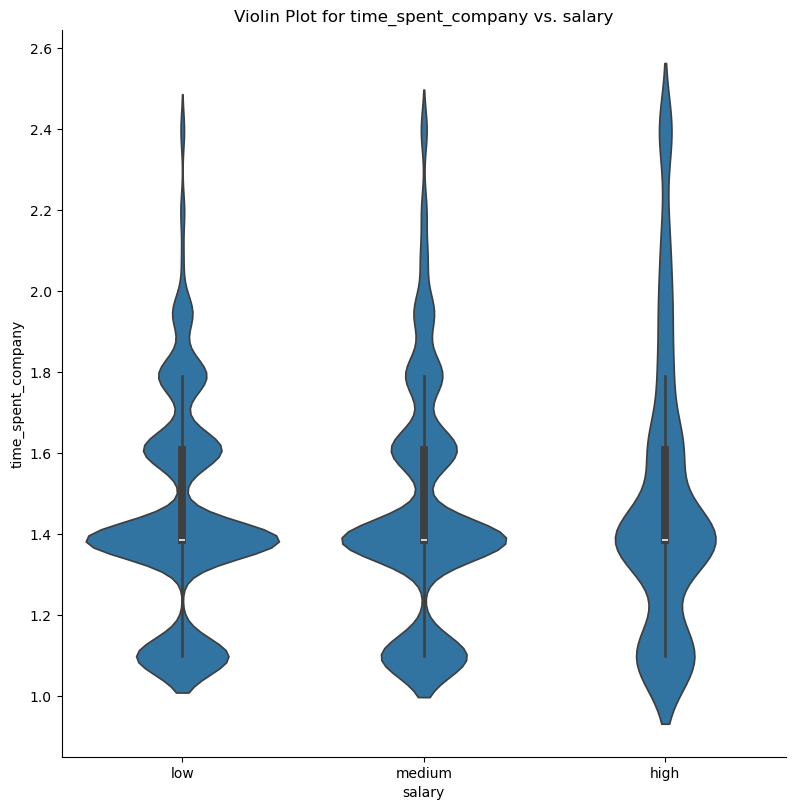

In [33]:
sns.catplot(data=data, x='salary', y='time_spent_company', kind='violin', height=8)
plt.title('Violin Plot for time_spent_company vs. salary')
plt.show()

**5.Plots a box plot for left vs. salary.**

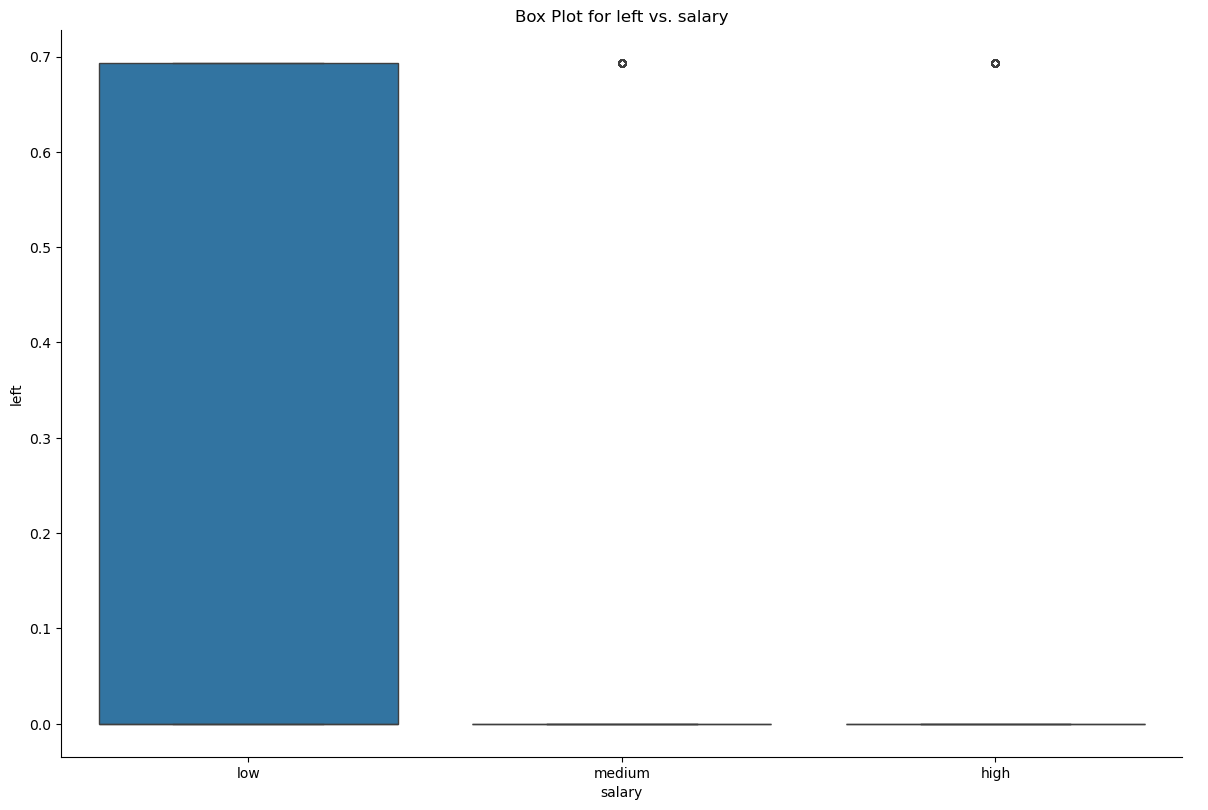

In [34]:
sns.catplot(data=data, x='salary', y='left', kind='box', height=8, aspect=1.5)
plt.title('Box Plot for left vs. salary')
plt.show()


**6.Plots a violin plot for left vs. salary**

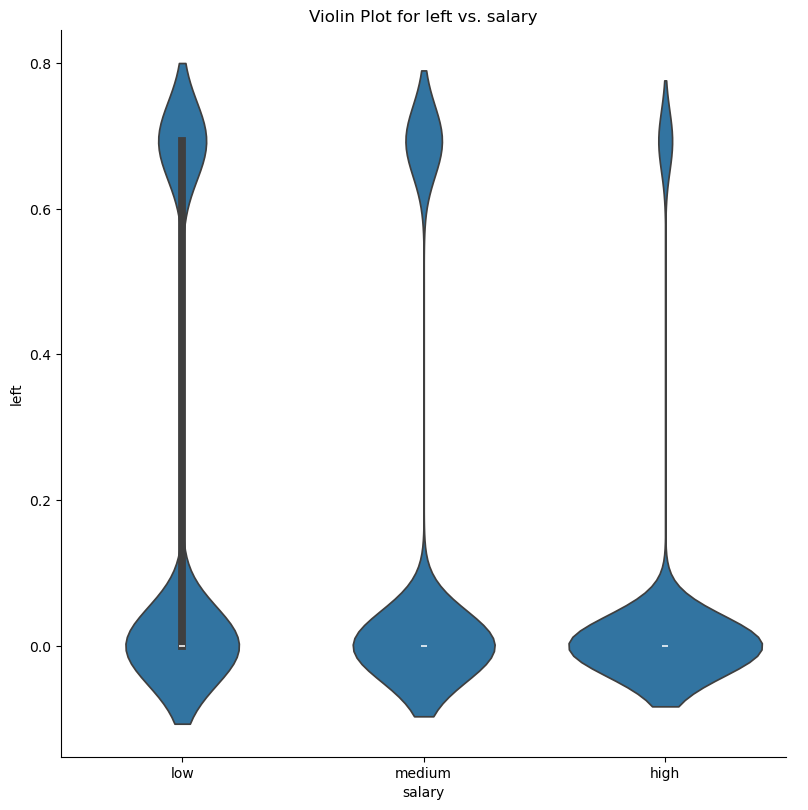

In [35]:
sns.catplot(data=data, x='salary', y='left', kind='violin', height=8)
plt.title('Violin Plot for left vs. salary')
plt.show()

Use **FacetGrid** to creates a grid of histograms for "satisfaction_level" data, grouped by "department" and "left" columns, with a dark grid style, and custom bin settings for the histograms.


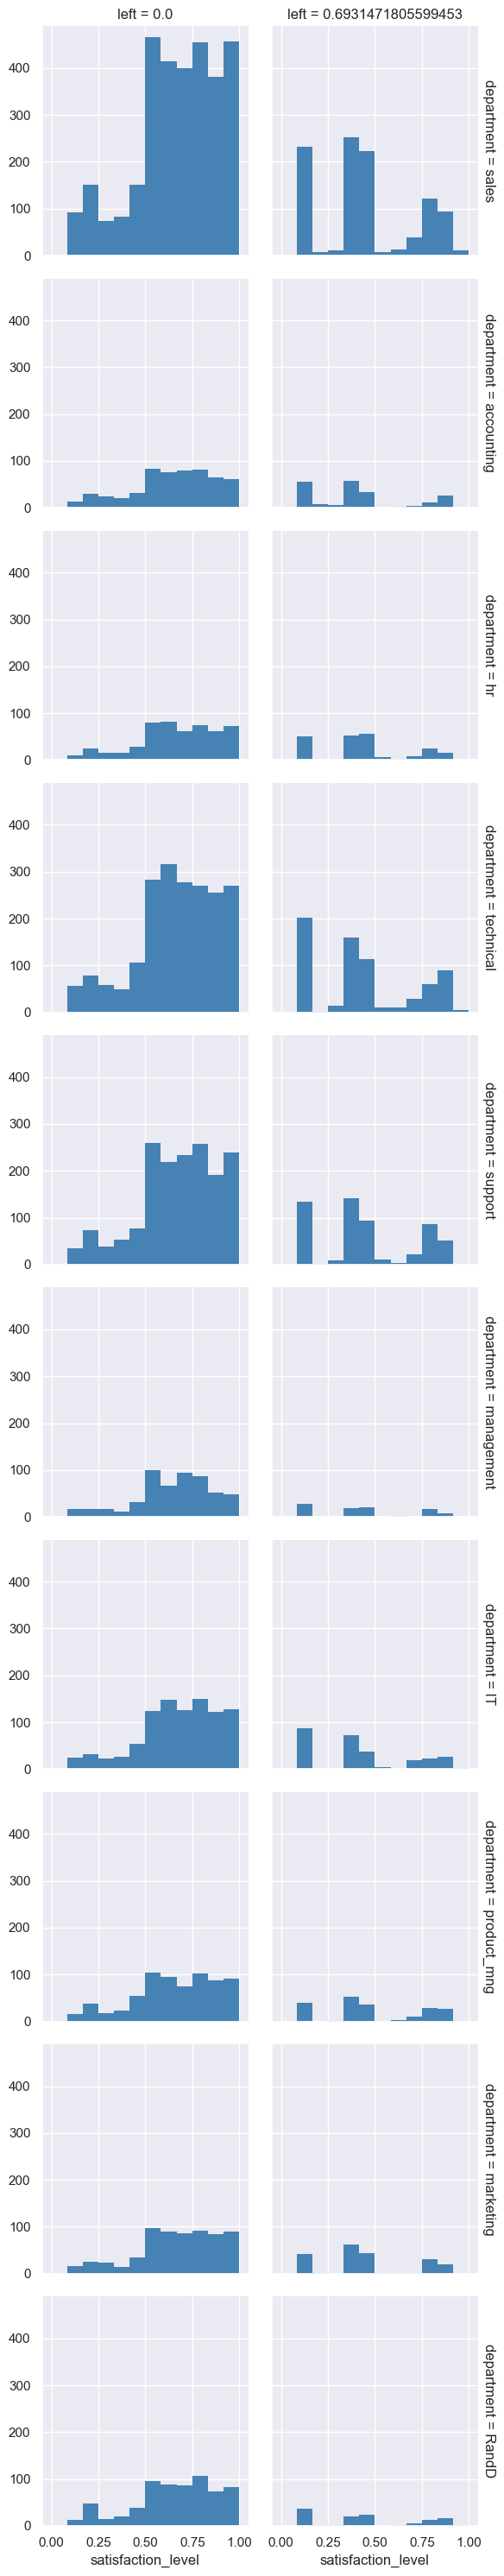

In [36]:
sns.set(style="darkgrid")
g = sns.FacetGrid(data, row="department", col="left", margin_titles=True)
bins = np.linspace(0, 1, 13)
g.map(plt.hist, "satisfaction_level", color="steelblue", bins=bins, lw=0)

generates a series of histograms to visualize the distribution of various features (like satisfaction level, salary level, etc.) for employees who left the company (leavers), using the Seaborn and Matplotlib libraries. The style is set to "white", with a muted color palette, and the plots are arranged in a 3x3 grid.

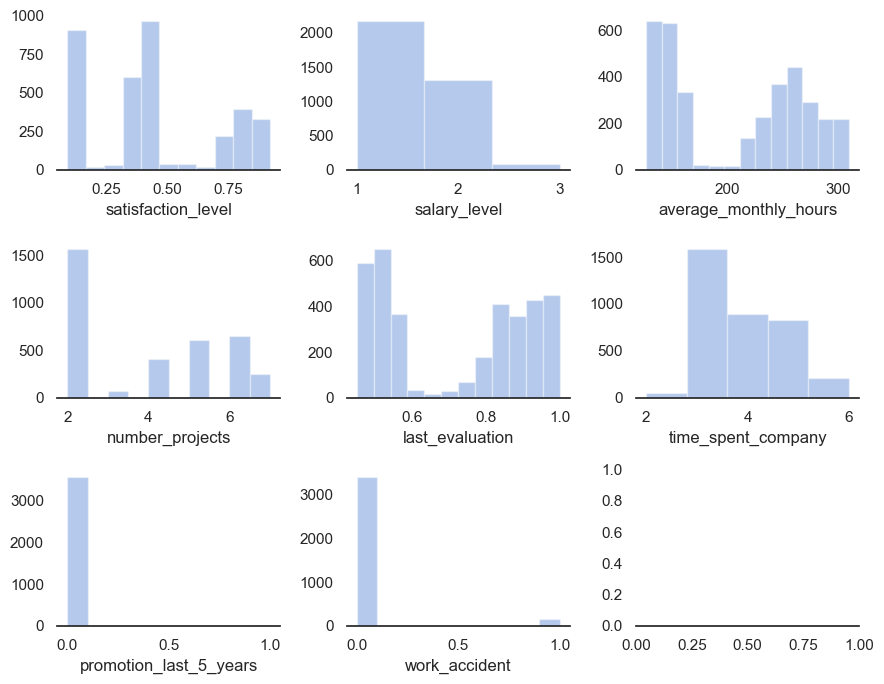

In [63]:
sns.set(style="white", palette="muted", color_codes=True)

# Set up the matplotlib figure



f, axes = plt.subplots(3, 3, figsize=(9,7))
sns.despine(left=True)

#people that left
leavers = data.loc[data['left'] == 1]

# Plot a simple histogram with binsize determined automatically
sns.distplot(leavers['satisfaction_level'], kde=False, color="b", ax=axes[0,0])
sns.distplot(leavers['salary_level'], bins=3, kde=False, color="b", ax=axes[0, 1])
sns.distplot(leavers['average_monthly_hours'], kde=False, color="b", ax=axes[0, 2])
sns.distplot(leavers['number_projects'], kde=False, color="b", ax=axes[1,0])
sns.distplot(leavers['last_evaluation'], kde=False, color="b", ax=axes[1, 1])
sns.distplot(leavers['time_spent_company'], kde=False, bins=5, color="b", ax=axes[1, 2])
sns.distplot(leavers['promotion_last_5_years'],bins=10, kde=False, color="b", ax=axes[2,0])
sns.distplot(leavers['work_accident'], bins=10,kde=False, color="b", ax=axes[2, 1])


plt.tight_layout()

prints a message explaining that the plots show the main reasons employees left the company, including salary, average monthly hours, satisfaction level, and last evaluation.

In [90]:
print("So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:\n1.salary average_montly_hours \n2.satisfaction_level\n3.last_evaluation")

So, from the plots we can see that most of the employees that left the company left because of thefoloowing reasons -:
1.salary average_montly_hours 
2.satisfaction_level
3.last_evaluation


In [66]:
print(data)

           name  satisfaction_level  last_evaluation  number_projects  \
0         SMITH                0.38             0.53                2   
1       JOHNSON                0.80             0.86                5   
2      WILLIAMS                0.11             0.88                7   
3         BROWN                0.72             0.87                5   
4         JONES                0.37             0.52                2   
...         ...                 ...              ...              ...   
14994     WELDY                0.40             0.57                2   
14995    VINTON                0.37             0.48                2   
14996    SALIBA                0.37             0.53                2   
14997    PARMAR                0.11             0.96                6   
14998    OSTLER                0.37             0.52                2   

       average_monthly_hours  time_spent_company  work_accident  left  \
0                        157                   3  

# 4. Feature Engineering

In [67]:
#Converts the data into a DataFrame.
df = pd.DataFrame(data) 
#Creates one-hot encoded columns for the 'salary' column.
df2 = pd.get_dummies(df['salary'], prefix="salary", prefix_sep="_", drop_first=True)
#Merges the original DataFrame with the one-hot encoded DataFrame.
df3 = pd.concat([df,df2], axis=1)

#Drop unnecessary columns.
#Removes the original 'salary' column.
df3.drop('salary', axis=1, inplace=True)
#Removes the 'name' column.
df3.drop('department', axis=1, inplace=True)
#Removes the 'name' column.
df3.drop('name', axis=1, inplace=True)
#Displays the first 1000 rows of the modified DataFrame.
df3.head(1000)

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,left,promotion_last_5_years,salary_level,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,1,1,0
1,0.80,0.86,5,262,6,0,1,0,2,0,1
2,0.11,0.88,7,272,4,0,1,0,2,0,1
3,0.72,0.87,5,223,5,0,1,0,1,1,0
4,0.37,0.52,2,159,3,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
995,0.38,0.46,2,144,3,0,1,0,1,1,0
996,0.38,0.54,2,157,3,0,1,0,2,0,1
997,0.86,0.94,5,224,5,0,1,0,2,0,1
998,0.37,0.46,2,155,3,0,1,0,2,0,1


Split data into features (X) and target (Y), and further divide into training and testing sets.

In [68]:
#Selects all columns except the 'left' column 
X = df3.loc[:, df3.columns != 'left']
#Selects the 'left' column as the target variable.
Y = df3.loc[:, df3.columns == 'left']
#Splits the data into training (70%) and testing (30%) sets.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=5)

# Check the first few rows of the training data
X_train.head()


,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,promotion_last_5_years,salary_level,salary_low,salary_medium
14404,0.09,0.82,6,249,4,0,0,2,0,1
2157,0.67,0.54,2,141,2,0,0,1,1,0
4249,0.95,0.81,3,260,2,0,0,1,1,0
13811,0.95,0.75,4,151,3,0,0,2,0,1
5625,0.64,0.57,3,179,3,0,0,2,0,1


# 5. Model Building

Train and test multiple models: Decision Tree, Logistic Regression, SVM, and Random Forest.

**1.Decision Tree Classifier**

A **Decision Tree Classifier** is a supervised machine learning algorithm that splits data into subsets based on feature conditions to classify outcomes in a tree-like structure.

In [72]:
#Creates a RandomForestClassifier instance, setting random_state=42 to ensure consistent and reproducible results.
dt_model = DecisionTreeClassifier(random_state=42)

# Fits the Decision Tree model to the training data (X_train for features, Y_train for target labels)..
dt_model.fit(X_train, Y_train)

# generates predictions for the test dataset using the trained model.
dt_predictions = dt_model.predict(X_test)

# Evaluation
print("Decision Tree Performance:")
#computes the proportion of correct predictions and prints it.
print("Accuracy:", accuracy_score(Y_test, dt_predictions))
#computes the ratio of true positives to all predicted positives and prints it.
print("Precision:", precision_score(Y_test, dt_predictions))
#computes the ratio of true positives to all actual positives and prints it.
print("Recall:", recall_score(Y_test, dt_predictions))
#Computes the harmonic mean of precision and recall for a balanced measure of performance.
print("F1 Score:", f1_score(Y_test, dt_predictions))
#generates and prints a comprehensive report of precision, recall, F1-score, and support for each class.
print(classification_report(Y_test, dt_predictions))

Decision Tree Performance:
Accuracy: 0.9822222222222222
Precision: 0.9565610859728507
Recall: 0.970615243342516
F1 Score: 0.9635369188696444
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      3411
           1       0.96      0.97      0.96      1089

    accuracy                           0.98      4500
   macro avg       0.97      0.98      0.98      4500
weighted avg       0.98      0.98      0.98      4500



**2.Random Forest Classifier**

A **Random Forest Classifier** is an ensemble machine learning algorithm that combines multiple decision trees to improve predictive accuracy and control overfitting by averaging their outputs.

In [73]:
# Creates a RandomForestClassifier instance, setting random_state=42 to ensure consistent and reproducible results.
rf_model = RandomForestClassifier(random_state=42)

# Fits the Random Forest model to the training data (X_train for features, Y_train for target labels).
rf_model.fit(X_train, Y_train)

#generates predictions for the test dataset using the trained model.
rf_predictions = rf_model.predict(X_test)

# Evaluation
print("Random Forest Performance:")
#computes the proportion of correct predictions and prints it.
print("Accuracy:", accuracy_score(Y_test, rf_predictions))
#computes the ratio of true positives to all predicted positives and prints it.
print("Precision:", precision_score(Y_test, rf_predictions))
##computes the ratio of true positives to all actual positives and prints it.
print("Recall:", recall_score(Y_test, rf_predictions))
#Computes the harmonic mean of precision and recall for a balanced measure of performance.
print("F1 Score:", f1_score(Y_test, rf_predictions))
#generates and prints a comprehensive report of precision, recall, F1-score, and support for each class.
print(classification_report(Y_test, rf_predictions))


Random Forest Performance:
Accuracy: 0.9922222222222222
Precision: 0.9934456928838952
Recall: 0.9742883379247016
F1 Score: 0.9837737598516458
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3411
           1       0.99      0.97      0.98      1089

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



**3. Support Vector Classifier (SVC)**

A **Support Vector Classifier (SVC)** is a supervised machine learning algorithm that finds the optimal hyperplane to separate data into classes by maximizing the margin between the closest data points (support vectors) of different classes.

In [76]:
# Creates a Support Vector Classifier instance, setting random_state=42 to ensure consistent and reproducible results.
svc_model = SVC(probability=True, random_state=42)

# Fits the Support Vector model to the training data (X_train for features, Y_train for target labels).
svc_model.fit(X_train, Y_train)

# generates predictions for the test dataset using the trained model.
svc_predictions = svc_model.predict(X_test)

# Evaluation
print("SVC Performance:")
#computes the proportion of correct predictions and prints it.
print("Accuracy:", accuracy_score(Y_test, svc_predictions))
#computes the ratio of true positives to all predicted positives and prints it.
print("Precision:", precision_score(Y_test, svc_predictions))
#computes the ratio of true positives to all actual positives and prints it.
print("Recall:", recall_score(Y_test, svc_predictions))
#Computes the harmonic mean of precision and recall for a balanced measure of performance.
print("F1 Score:", f1_score(Y_test, svc_predictions))
#generates and prints a comprehensive report of precision, recall, F1-score, and support for each class.
print(classification_report(Y_test, svc_predictions))


SVC Performance:
Accuracy: 0.7775555555555556
Precision: 0.9888888888888889
Recall: 0.08172635445362718
F1 Score: 0.15097540288379985
              precision    recall  f1-score   support

           0       0.77      1.00      0.87      3411
           1       0.99      0.08      0.15      1089

    accuracy                           0.78      4500
   macro avg       0.88      0.54      0.51      4500
weighted avg       0.83      0.78      0.70      4500



**4. Logistic Regression**


**Logistic Regression** is a supervised machine learning algorithm used for binary or multi-class classification tasks that models the probability of an outcome using a logistic function.

In [77]:
# Creates a Logistic Regression instance, setting random_state=42 to ensure consistent and reproducible results.
lr_model = LogisticRegression(random_state=42)

#Fits the Logistic Regression model to the training data (X_train for features, Y_train for target labels).
lr_model.fit(X_train, Y_train)

# generates predictions for the test dataset using the trained model.
lr_predictions = lr_model.predict(X_test)

# Evaluation
print("Logistic Regression Performance:")
#computes the proportion of correct predictions and prints it.
print("Accuracy:", accuracy_score(Y_test, lr_predictions))
#computes the ratio of true positives to all predicted positives and prints it.
print("Precision:", precision_score(Y_test, lr_predictions))
##computes the ratio of true positives to all actual positives and prints it.
print("Recall:", recall_score(Y_test, lr_predictions))
#Computes the harmonic mean of precision and recall for a balanced measure of performance.
print("F1 Score:", f1_score(Y_test, lr_predictions))
#generates and prints a comprehensive report of precision, recall, F1-score, and support for each class.
print(classification_report(Y_test, lr_predictions))


Logistic Regression Performance:
Accuracy: 0.7802222222222223
Precision: 0.5801282051282052
Recall: 0.33241505968778695
F1 Score: 0.4226503210741389
              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3411
           1       0.58      0.33      0.42      1089

    accuracy                           0.78      4500
   macro avg       0.70      0.63      0.64      4500
weighted avg       0.76      0.78      0.76      4500



 **Summary of Results**

store the results of all models and compare them.

In [78]:
# Summary of metrics for all models
#Creates a dictionary to store performance metrics (accuracy, precision, recall, and F1 score) for four models.
results = {
    "Model": ["Decision Tree", "Random Forest", "SVC", "Logistic Regression"],
    #Calculates the accuracy of the models by comparing predicted values to the true test labels.
    "Accuracy": [
        accuracy_score(Y_test, dt_predictions),
        accuracy_score(Y_test, rf_predictions),
        accuracy_score(Y_test, svc_predictions),
        accuracy_score(Y_test, lr_predictions)
    ],
    #Computes the precision of the models, measuring the ratio of true positives to all predicted positives.
    "Precision": [
        precision_score(Y_test, dt_predictions),
        precision_score(Y_test, rf_predictions),
        precision_score(Y_test, svc_predictions),
        precision_score(Y_test, lr_predictions)
    ],
    #Calculates the recall of the models, measuring the ratio of true positives to all actual positives.
    "Recall": [
        recall_score(Y_test, dt_predictions),
        recall_score(Y_test, rf_predictions),
        recall_score(Y_test, svc_predictions),
        recall_score(Y_test, lr_predictions)
    ],
    #Computes the F1 Score of the models, which is the harmonic mean of precision and recall.
    "F1 Score": [
        f1_score(Y_test, dt_predictions),
        f1_score(Y_test, rf_predictions),
        f1_score(Y_test, svc_predictions),
        f1_score(Y_test, lr_predictions)
    ]
}

# Convert to DataFrame for easy viewing
#Converts the results dictionary into a pandas DataFrame for easier tabular visualization.
results_df = pd.DataFrame(results)
#Outputs the DataFrame to display all metrics for the models in a tabular format.
print(results_df)


                 Model  Accuracy  Precision    Recall  F1 Score
0        Decision Tree  0.982222   0.956561  0.970615  0.963537
1        Random Forest  0.992222   0.993446  0.974288  0.983774
2                  SVC  0.777556   0.988889  0.081726  0.150975
3  Logistic Regression  0.780222   0.580128  0.332415  0.422650


# Phase 2:

# 1. Advanced Features with TensorFlow

Use **TensorFlow** for advanced feature engineering or model refinement.

**TensorFlow** is an open-source machine learning framework developed by Google that enables efficient building, training, and deployment of machine learning and deep learning models.

In [85]:
#Imports the TensorFlow library, which is used for building and training machine learning models.
import tensorflow as tf
#Imports the Sequential model class from Keras (part of TensorFlow), which allows you to build models layer by layer.
from tensorflow.keras.models import Sequential
#Imports the Dense layer from Keras, which is a fully connected layer used in the neural network.
from tensorflow.keras.layers import Dense

# TensorFlow model example
#Creates a Sequential model and adds three layers: an input layer with 64 units, a hidden layer with 32 units, and an output layer with 1 unit for binary classification.
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])
#Compiles the model using the Adam optimizer, binary cross-entropy loss function (for binary classification), and accuracy as the evaluation metric.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Trains the model on the training data (X_train and Y_train) for 10 epochs with a batch size of 32.
model.fit(X_train, Y_train, epochs=10, batch_size=32)

# Evaluate TensorFlow model on the test data (X_test and Y_test) to compute the loss and accuracy.
loss, accuracy = model.evaluate(X_test, Y_test)
#Prints the accuracy of the model on the test data after evaluation.
print("TensorFlow Model Accuracy:", accuracy)


Epoch 1/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.6980 - loss: 0.6659
Epoch 2/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7611 - loss: 0.5460
Epoch 3/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7740 - loss: 0.4869
Epoch 4/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7911 - loss: 0.4411
Epoch 5/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8124 - loss: 0.4013
Epoch 6/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8240 - loss: 0.3853
Epoch 7/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8120 - loss: 0.4449
Epoch 8/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8327 - loss: 0.3875
Epoch 9/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8402 - loss: 0.3635
Epoch 10/10
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8449 - loss: 0.3707
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7592 - loss: 0.4330
TensorFlow Model Accuracy: 0.765333354473114


# 2. Model Finalization

Save the best-performing model as a pickle file.

In [79]:
#Imports the pickle module, which is used for serializing (saving) and deserializing (loading) Python objects.
import pickle

# Define the trained models dictionary y to store the trained models, with model names as keys 
models = {
    "Decision Tree": dt_model,
    "Random Forest": rf_model,
    "SVM": svc_model,
    "Logistic Regression": lr_model
}

# Define the best model.Sets the name of the best model (in this case, "Random Forest") that you want to save, based on your evaluation.
best_model = "Random Forest"  # Replace this with the actual best model name based on your evaluation.

# Save the best model
#Retrieves the trained model corresponding to the best_model from the models dictionary.
final_model = models[best_model]
with open('final_model.pkl', 'wb') as file: #Opens a file named final_model.pkl in write-binary mode to store the best model.
    pickle.dump(final_model, file)  #Serializes and saves the final_model (the best model) into the opened file.
#Prints a message indicating that the selected best model has been successfully saved to the file final_model.pkl.
print(f"{best_model} saved as final_model.pkl.")


Random Forest saved as final_model.pkl.


**3. Comprehensive Analysis**

Use PowerBI for detailed outcome visualization.

In [29]:
print("Random Forest Performance:")
print("Accuracy:", accuracy_score(Y_test, rf_predictions))
print("Precision:", precision_score(Y_test, rf_predictions))
print("Recall:", recall_score(Y_test, rf_predictions))
print("F1 Score:", f1_score(Y_test, rf_predictions))
print(classification_report(Y_test, rf_predictions))


Random Forest Performance:
Accuracy: 0.9922222222222222
Precision: 0.9934456928838952
Recall: 0.9742883379247016
F1 Score: 0.9837737598516458
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3411
           1       0.99      0.97      0.98      1089

    accuracy                           0.99      4500
   macro avg       0.99      0.99      0.99      4500
weighted avg       0.99      0.99      0.99      4500



In [30]:
print("Total number of employees which are likely to leave: ", sum(rf_predictions))

Total number of employees which are likely to leave:  1068


In [80]:
#Filters the df3 DataFrame to include only rows where the left column value is 0 (indicating employees who have not left).
df4 = df3[df3['left']==0]
#Displays the first few rows of the filtered df4 DataFrame to inspect the data.
df4.head()
#Removes the left column from the df4 DataFrame, as it is no longer needed for further analysis.
df4.drop('left', axis=1, inplace=True)
#Displays the first few rows of the modified df4 DataFrame after the left column has been dropped.
df4.head()
#Converts the df4 DataFrame to a NumPy array, storing the feature values in variable a.
a = df4.values
#Uses the trained rf_model (Random Forest) to predict the probability of each class for the input features a.
probability = rf_model.predict_proba(a)
#Displays the predicted probabilities for each class for the data in a.
probability

array([[1.  , 0.  ],
       [1.  , 0.  ],
       [0.95, 0.05],
       ...,
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ]])

Prints the number of employees who are predicted to definitely leave (i.e., those with a predicted probability of 1 for the "leave" class) by summing the occurrences where the second column of the `probability` array equals 1.

In [33]:
print('Number of employees that will definitely leave: ', sum(probability[:, 1]==1))

Number of employees that will definitely leave:  2


In [81]:
#Prints the shape (dimensions) of the probability array, showing the number of rows (predictions) and columns (classes).
print(probability.shape)
#Prints the shape (dimensions) of the df4 DataFrame, showing the number of rows (employees) and columns (features).
print(df4.shape)

(11428, 2)
(11428, 10)


In [82]:
#Adds a new column called SoonLeave to the df4 DataFrame, storing the predicted probability of employees leaving (second class in the probability array).
df4['SoonLeave'] = probability[:, 1]
#Filters the df4 DataFrame to show only the rows where the predicted probability of leaving (SoonLeave) is greater than 0.5, indicating employees who are likely to leave.
df4[df4['SoonLeave'] > 0.5]

,satisfaction_level,last_evaluation,number_projects,average_monthly_hours,time_spent_company,work_accident,promotion_last_5_years,salary_level,salary_low,salary_medium,SoonLeave
2095,0.54,0.67,4,282,6,0,0,2,0,1,0.69
5565,0.84,0.84,6,261,5,0,0,1,1,0,0.55
5847,0.77,0.85,5,221,5,0,0,1,1,0,0.99
6358,0.81,0.98,5,243,6,0,0,2,0,1,0.99
6466,0.39,0.57,2,132,3,0,0,1,1,0,1.00
7762,0.82,0.87,5,273,6,0,0,2,0,1,0.97
9781,0.42,0.50,2,151,3,0,0,1,1,0,1.00


In [83]:
#Calculates the total number of employees predicted to leave by summing the number of probabilities greater than 0.5 in the second column of the probability array.
soonleave = sum(probability[:, 1] > 0.5)
#Displays the value of soonleave, which represents the number of employees predicted to leave the company.
soonleave
#Prints a message with the number of employees (stored in soonleave) predicted to soon leave the company.
print('So, ' + str(soonleave) + ' employees will soon leave the company.')
 

So, 7 employees will soon leave the company.
